# **Fuel Efficiency Prediction**

# New Section

# New Section

In [1]:
#importing the required libraries
# importing pandas for statistics.
# seaborn for performing statistical graphics
# importing matplotlib.pyplot to plot 2D Graphics

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the data present in the dataset through pandas dataframe

df=pd.read_csv('mpg_raw.csv')

In [3]:
# checking the first few of the dataframe
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# computing and displaying the summary statistics of the dataframe.
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,1510.000000,1510.000000,1510.000000,1490.000000,1510.000000,1510.000000,1510.000000
mean,23.061523,5.515232,196.999338,105.732886,2997.238411,15.513046,75.733113
std,7.634573,1.713616,105.254049,38.851370,854.499865,2.756109,3.586611
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,76.000000,2228.500000,13.700000,73.000000
50%,22.000000,4.000000,151.000000,95.000000,2855.000000,15.500000,76.000000
75%,28.000000,8.000000,302.000000,130.000000,3645.000000,17.000000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
#We count the number of null/missing values in the data_recorded dataframe.
df.isnull().sum()

mpg              0
cylinders        0
displacement     0
horsepower      20
weight           0
acceleration     0
model_year       0
origin           0
name             0
dtype: int64

<Axes: xlabel='horsepower'>

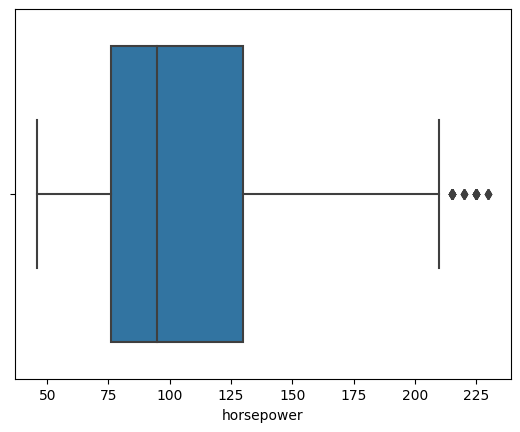

In [6]:
# We plot the boxplot for the Horsepower column of the data_recorded dataframe .
# In order to plot the distribution of the Variable"horsepower" , box plot is used.
sns.boxplot(x=df['horsepower'])

In [7]:
# Fill out the missing values
#this is performed to fill the missing(NaN)which are present in the "horsepower" column of data_recorded dataframe
median = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(median)

In [8]:
# verification step
# this is done to count the total number of missing values(null) of each column of data_recorded dataframe.

df.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

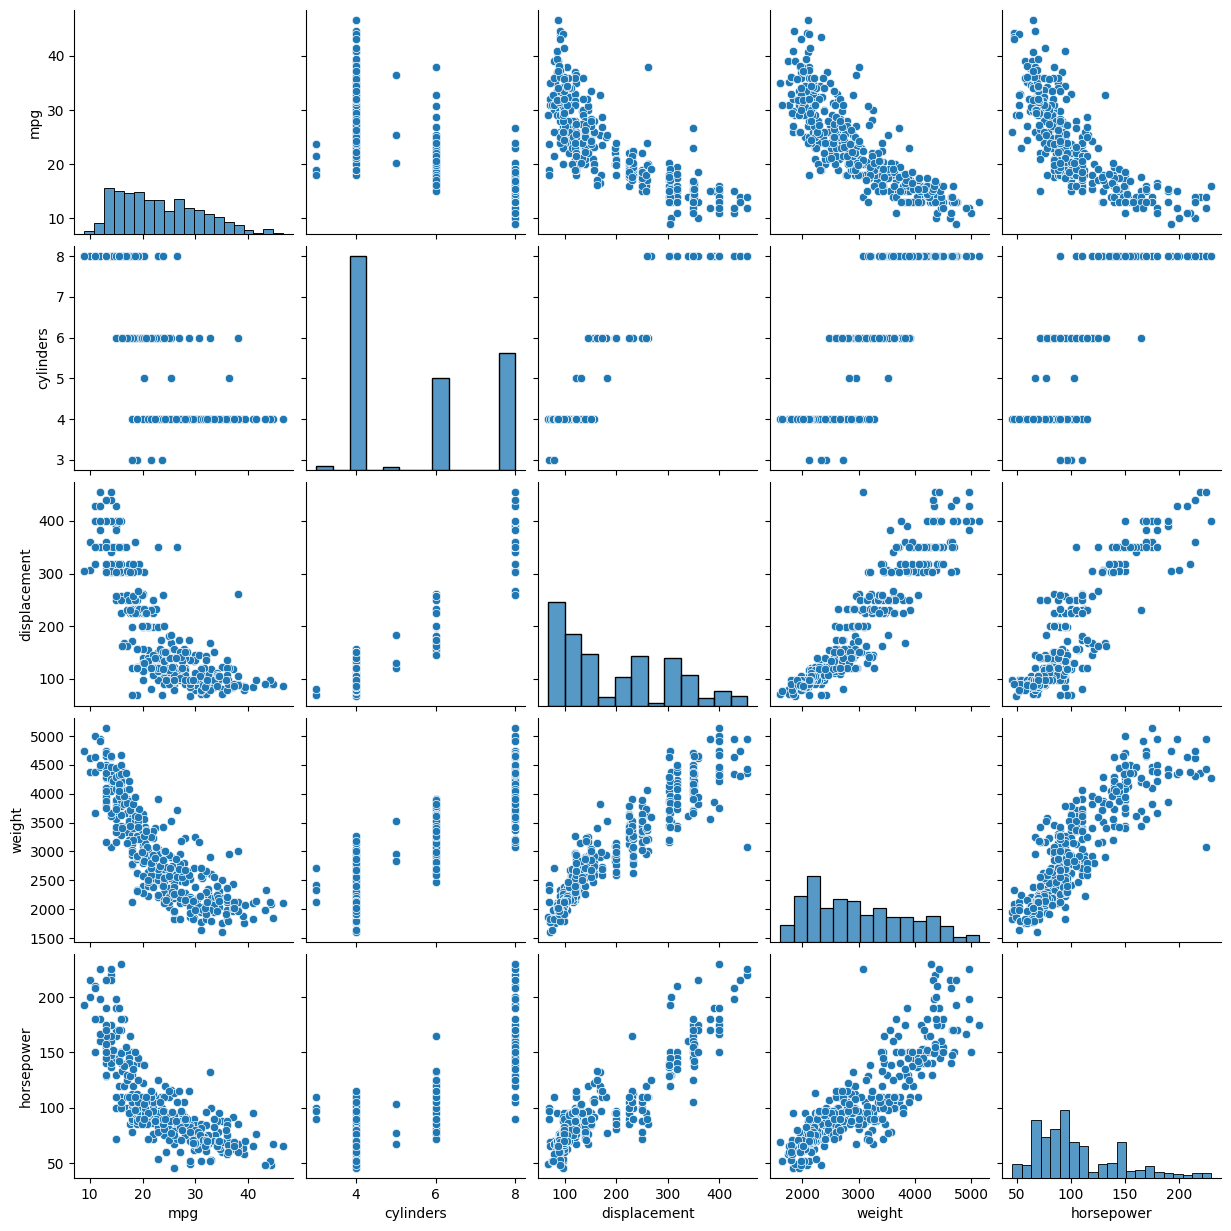

In [9]:
selected_columns = ["mpg", "cylinders", "displacement", "weight", "horsepower"]
pairplot_data = df[selected_columns]
##done to create the pair plots for specific mentioned columns
## Visualiztion is done (pairwise relationship)and distributions between each variables
# Creating pairplots to visualize potential correlations
sns.pairplot(pairplot_data)
plt.show()

In [10]:
#done to extract the brand names from the name column of dataframe.

brands_list=[]
for i in range(1510):
    brands_list.append(df['name'][i].split(" ")[0])

In [11]:
# this line is used in order to add a new column brand to data_recorded dataframe
# This is then used to populate it with the list_of_brands
# assigination of each brand to respective row is done here on the 'name' column.
df['brand']=brands_list

In [12]:
#  cleaning and standardization of the brand names is done in the "brand" column of "data_recorded" dataframe

df['brand'] = df['brand'].replace(['volkswagen','vokswagen','vw'],'volkswagen')
df['brand'] = df['brand'].replace('maxda','mazda')
df['brand'] = df['brand'].replace('toyouta','toyota')
df['brand'] = df['brand'].replace('mercedes-benz','mercedes')
df['brand'] = df['brand'].replace('nissan','datsun')
df['brand'] = df['brand'].replace('capri','ford')
df['brand'] = df['brand'].replace(['chevroelt','chevy'],'chevrolet')

In [13]:
# Done to count and display the repeatations of each brand .
# provides us a summary of distributions of each car brands of datasets
df['brand'].value_counts()

ford          200
chevrolet     182
plymouth      119
amc           111
dodge         106
toyota         96
datsun         88
volkswagen     82
buick          65
pontiac        62
honda          45
mercury        43
mazda          41
oldsmobile     38
fiat           32
peugeot        31
audi           26
volvo          23
chrysler       22
renault        18
opel           16
saab           16
subaru         14
mercedes       11
cadillac        8
bmw             8
hi              4
triumph         3
Name: brand, dtype: int64

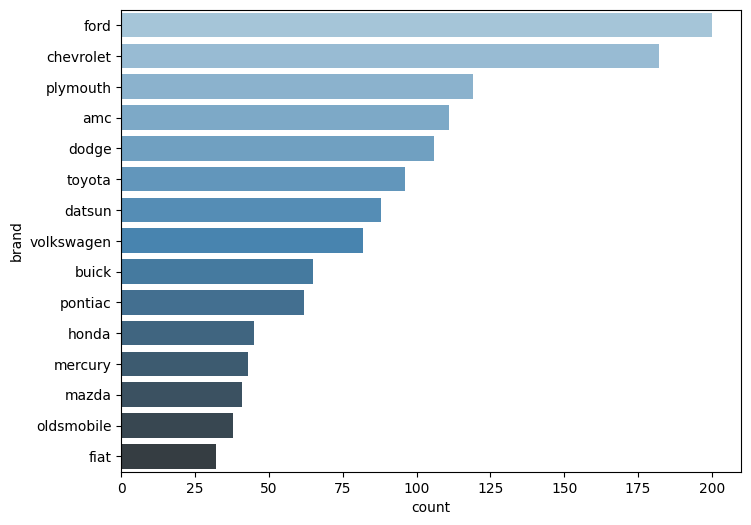

In [14]:
# A horizontal bar plot is created using the libraries seaborn and matplotlib,
# this is done to visualize the count distribution that happens acorss the top 15 brands in the 'brand' column.

plt.figure(figsize=(8, 6))

# Creating a countplot for the 'brand' column in the 'data' DataFrame
sns.countplot(y="brand", data=df, palette="Blues_d",
              order=df['brand'].value_counts().iloc[:15].index)

# Displaying the plot
plt.show()

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [16]:
# a new column displacement_in_cubic centimeters for which the liters values is being converted to cubic centimeters

df['displacement_in_cc']=df['displacement']*16.387

In [17]:
# Here , this is done to create a new column weights_in_kg
# Here , the weight is converted from the existing pounds to kilograms
# conversion factor is set to 2.205

df['weight_in_kg']=df['weight']/2.205

In [19]:
#converting mpg to kpl

df['mileage_kpl']=df['mpg']/2.352

In [20]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,displacement_in_cc,weight_in_kg,mileage_kpl
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,5030.809,1589.115646,7.653061
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,5735.450,1674.829932,6.377551
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,5211.066,1558.276644,7.653061
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,4981.648,1556.916100,6.802721
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,4948.874,1564.172336,7.227891


In [21]:
# This is used to display summary of data_recorded dataframe
# this provides valuable information about the datatypes , non-null values ,count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mpg                 1510 non-null   float64
 1   cylinders           1510 non-null   int64  
 2   displacement        1510 non-null   float64
 3   horsepower          1510 non-null   float64
 4   weight              1510 non-null   int64  
 5   acceleration        1510 non-null   float64
 6   model_year          1510 non-null   int64  
 7   origin              1510 non-null   object 
 8   name                1510 non-null   object 
 9   brand               1510 non-null   object 
 10  displacement_in_cc  1510 non-null   float64
 11  weight_in_kg        1510 non-null   float64
 12  mileage_kpl         1510 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 153.5+ KB


In [22]:
# WE convert the Horsepower column in the "data_recorded"dataframe to the integer type
# Because it was prsent as float values
df['horsepower']=df['horsepower'].astype(int)

In [23]:
# This is done to convert categorical values in the Origin values of Data_recorded dataframe
# to numerical representations
df['origin'] = df['origin'].replace('usa',1)
df['origin'] = df['origin'].replace('europe',2)
df['origin'] = df['origin'].replace('japan',3)

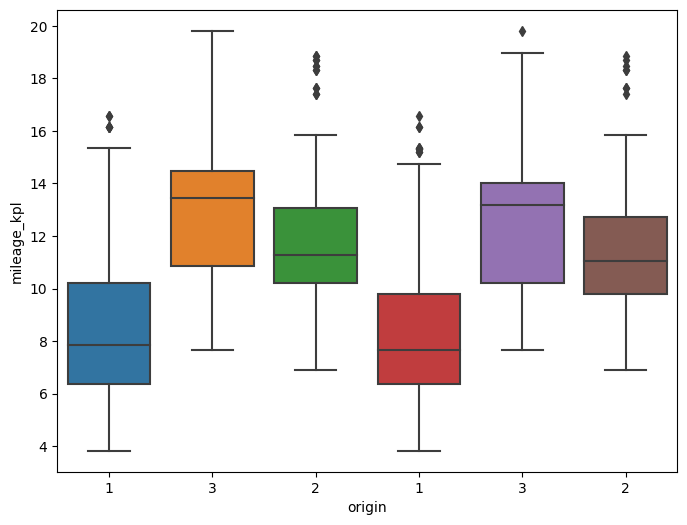

In [24]:
##origin and performance of the vehicles is done and noted
plt.figure(figsize=(8,6))
sns.boxplot(x=df['origin'],y=df['mileage_kpl']);


its clear that the origin of the car has a good impact on the mileage,with asian cars dominating the league.

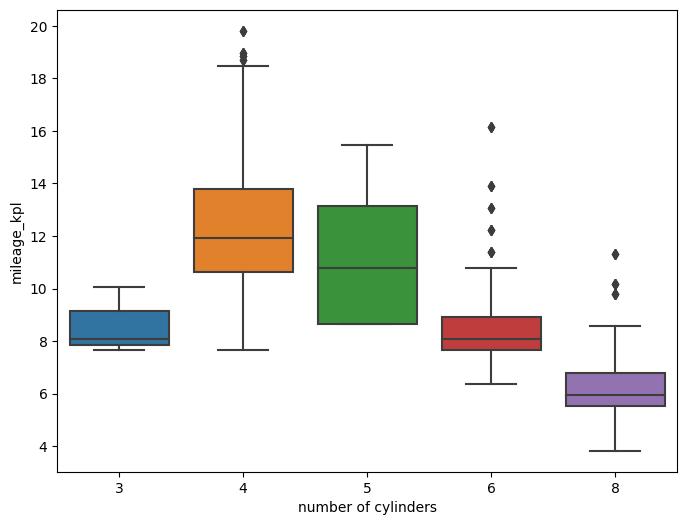

In [25]:
# WE created a box plot using the sns and matplotlib libraries
# distribution of the "mileage_in_km_per_litre" is visualized for different amount of cylinders.
plt.figure(figsize=(8,6))
sns.boxplot(y=df['mileage_kpl'],x=df['cylinders'])
plt.xlabel("number of cylinders");

A negative distribution is observed here , cause the more the number of the cylinders ,the more amount of power is required , hence more fuel .

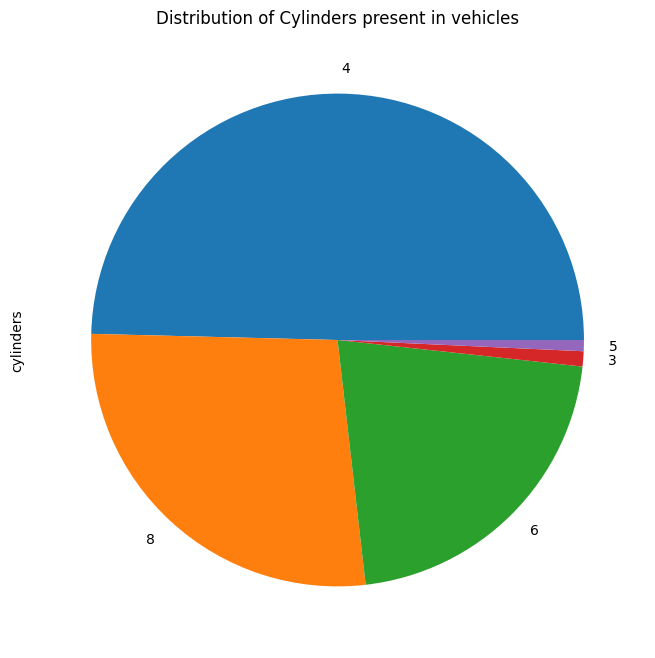

In [26]:
#plotting pie chart for cylinders columns in the dataset

# Set the figure size
plt.figure(figsize=(14, 8))

# Creating a pie chart for the 'cylinders' column in the 'df' DataFrame
df['cylinders'].value_counts().plot(kind='pie')

# Adding a title to the plot
plt.title('Distribution of Cylinders present in vehicles')

# Display the plot
plt.show()

We can observe one thing that there are more vehicles that v4,v6,v8 instead of vehicles that use v3,v5

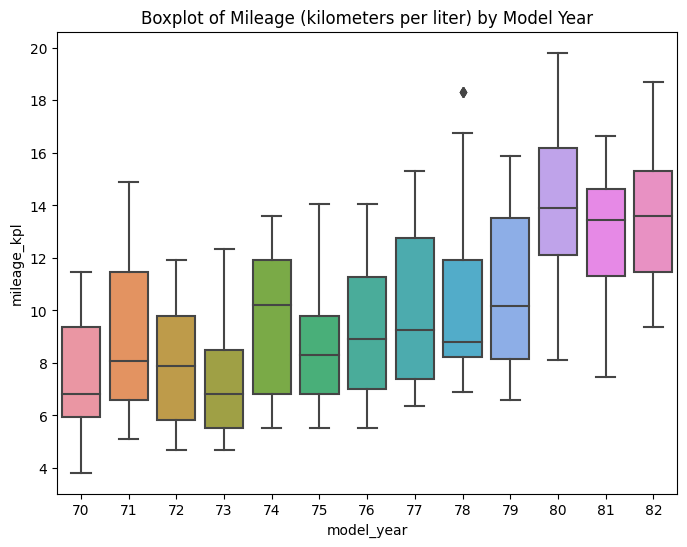

In [27]:
#plotting boxplots to observe the performance over years

# Set the figure size
plt.figure(figsize=(8, 6))

# Creating a boxplot for the relationship between 'model_year' and 'mileage_kpl'
sns.boxplot(x=df['model_year'], y=df['mileage_kpl'])

# Adding a title to the plot
plt.title('Boxplot of Mileage (kilometers per liter) by Model Year')

# Display the plot
plt.show()

with the technology being updated with time the performance of the vehicles has increased a lot.

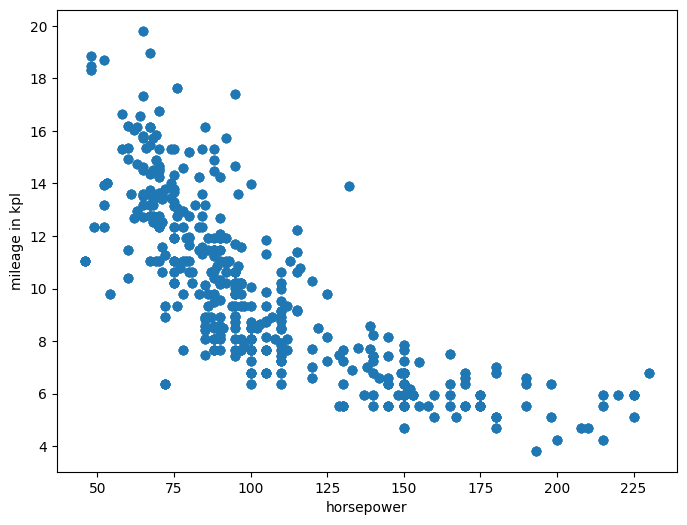

In [28]:
##Distribution relationship between the horsepower of the vehicle and the mileage in km/litre
# it is a negative distribution
plt.figure(figsize=(8,6))
plt.scatter(df.horsepower,df.mileage_kpl)
plt.xlabel('horsepower')
plt.ylabel('mileage in kpl');

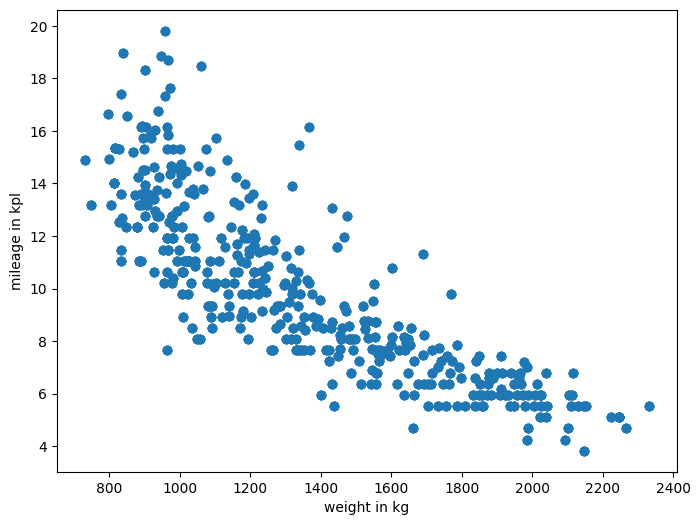

In [29]:
#scatterplot plotted against the weight to understand its impact on the mileage
# negative distribution proves us that as the weight increases , the mileage decreases .

plt.figure(figsize=(8,6))
plt.scatter(df.weight_in_kg,df.mileage_kpl)
plt.xlabel('weight in kg')
plt.ylabel('mileage in kpl');

In [30]:
# creating a custiom dataframe from the existing data_recorded dataframe.
X=df.drop(['displacement','weight','name','brand','mpg'],axis=1)

In [31]:
X.head()

,cylinders,horsepower,acceleration,model_year,origin,displacement_in_cc,weight_in_kg,mileage_kpl
0,8,130,12.0,70,1,5030.809,1589.115646,7.653061
1,8,165,11.5,70,1,5735.450,1674.829932,6.377551
2,8,150,11.0,70,1,5211.066,1558.276644,7.653061
3,8,150,12.0,70,1,4981.648,1556.916100,6.802721
4,8,140,10.5,70,1,4948.874,1564.172336,7.227891


In [32]:
# this is done to calculate the correlation matrix
# this provides correlation between each and every variable .
X.corr()

<ipython-input-32-db77cb7b46c9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corr()


,cylinders,horsepower,acceleration,model_year,displacement_in_cc,weight_in_kg,mileage_kpl
cylinders,1.000000,0.841228,-0.513416,-0.322539,0.951059,0.897234,-0.779880
horsepower,0.841228,1.000000,-0.691855,-0.395203,0.896220,0.862499,-0.774778
acceleration,-0.513416,-0.691855,1.000000,0.283125,-0.552254,-0.425818,0.421519
model_year,-0.322539,-0.395203,0.283125,1.000000,-0.347444,-0.282527,0.555668
displacement_in_cc,0.951059,0.896220,-0.552254,-0.347444,1.000000,0.932899,-0.807858
weight_in_kg,0.897234,0.862499,-0.425818,-0.282527,0.932899,1.000000,-0.835979
mileage_kpl,-0.779880,-0.774778,0.421519,0.555668,-0.807858,-0.835979,1.000000


<ipython-input-33-e5a2839ba473>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(),annot=True);


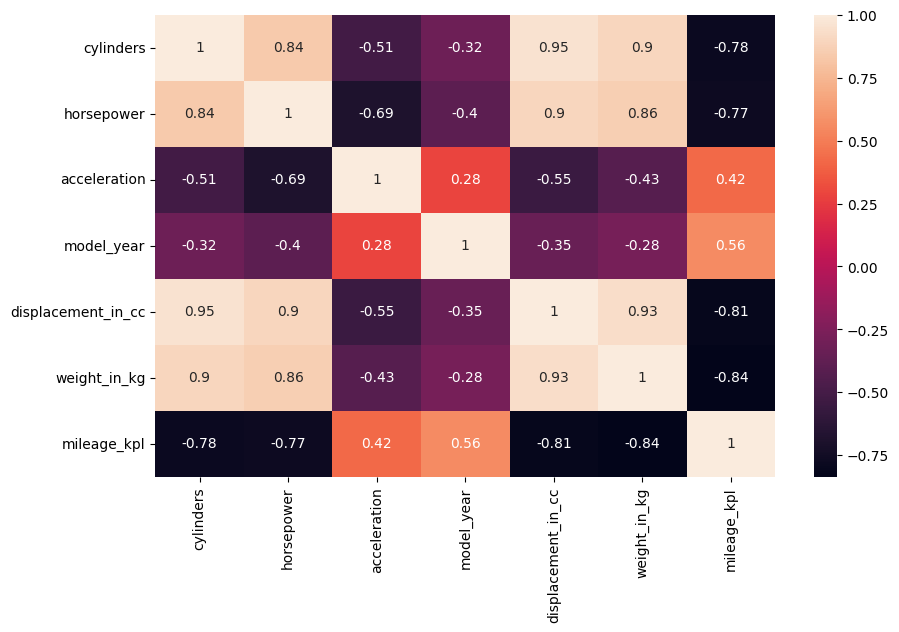

In [33]:
#plot heatmap using the seaborn nad matplotlib
# visualized the entire correlation matrix of the variable_a
# here , annoted is set to true which displays the entire info in the map

plt.figure(figsize=(10,6))
sns.heatmap(X.corr(),annot=True);

In [34]:
# We then print the correlation coefficients between the variable and other variables in the dataframe
# we then sort it in descending order.
correlation_with_mileage = X.corr()["mileage_kpl"]
sorted_correlation = correlation_with_mileage.sort_values(ascending=False)
print(sorted_correlation)


mileage_kpl           1.000000
model_year            0.555668
acceleration          0.421519
horsepower           -0.774778
cylinders            -0.779880
displacement_in_cc   -0.807858
weight_in_kg         -0.835979
Name: mileage_kpl, dtype: float64


<ipython-input-34-b0e2b983ee29>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_mileage = X.corr()["mileage_kpl"]


All these relations are proved by the visualisation we did.

In [35]:
X.head()

,cylinders,horsepower,acceleration,model_year,origin,displacement_in_cc,weight_in_kg,mileage_kpl
0,8,130,12.0,70,1,5030.809,1589.115646,7.653061
1,8,165,11.5,70,1,5735.450,1674.829932,6.377551
2,8,150,11.0,70,1,5211.066,1558.276644,7.653061
3,8,150,12.0,70,1,4981.648,1556.916100,6.802721
4,8,140,10.5,70,1,4948.874,1564.172336,7.227891


In [36]:
# we then form the dataset y with a mileage kpl of the variablex
y=X['mileage_kpl']

In [37]:
X=X.drop(['mileage_kpl'],axis=1)

In [38]:
X.head()

,cylinders,horsepower,acceleration,model_year,origin,displacement_in_cc,weight_in_kg
0,8,130,12.0,70,1,5030.809,1589.115646
1,8,165,11.5,70,1,5735.450,1674.829932
2,8,150,11.0,70,1,5211.066,1558.276644
3,8,150,12.0,70,1,4981.648,1556.916100
4,8,140,10.5,70,1,4948.874,1564.172336


Getting test and train sets


In [39]:
# importing required libraries to perform testing and training
from sklearn.model_selection import train_test_split


In [40]:
# here , we are spllitting the dataset into 80% ,20%
# here ,80% is the testing data
# 20# is the training data
# generally done to assess the performance
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)


Linear Regression

In [41]:
# importing required libraries to perform linear regression
from sklearn.linear_model import LinearRegression

In [42]:
# assigning linear reg funciton to a variable
lr=LinearRegression()

In [43]:
# this is used to train a machine learning model lr using the training data 20#
# this is done to learn patterns and relationshiips
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
# This is used generate predictions on unseen data aka test data
# done by using a trained model ml
y_pred=lr.predict(X_test)

In [45]:
# this is used to calculate and returns the determination (rsquared) to assess the primary performance of the model that is trained.
lr.score(X_test,y_test)

0.8124474584313665

In [46]:
# this is done to evaluate the MSE MAE RMSE R2 score
from sklearn import metrics
import numpy as np

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 1.0256311167566563
Mean Squared Error(MSE): 1.8863439418848533
Root Mean Squared Error(RMSE): 1.3734423693351145
R2 Score: 0.8124474584313665


In [47]:
# Using the trained model to predict the vehicle's mileage and evaluating the results for satisfaction.

lr.predict([[4,120,9.7,90,3,1497,1160]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.51714385])

Random Forest

In [48]:
# this is imported in order to calculate the MAE,which is usd to asses accuracy
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [49]:
# this code is done to instantiate the random forest regresstion model with an overall of 50 decision trees.
model_rf = RandomForestRegressor(n_estimators=50)

In [50]:
# this is used to trainee the random forest regression model by providing the X and y training and the testing data.
model_rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [51]:
# Generation of predictions on new or unseen data using the RF regression model
y_pred_rf = model_rf.predict(X_test)

In [52]:
# calculate teh MAE, MSE , RMSE , R2 score , WHy: to assess the performance .
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_rf))

Mean Absolute Error: 0.10558577735730068
Mean Squared Error: 0.04121174264295045
Root Mean Squared Error: 0.20300675516580835
R2 Score: 0.9959024614209885


In [53]:
model_rf.predict([[4,120,9.7,90,3,1497,1160]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([13.19897959])

In [54]:
#Model Evaluation , to make predictions of the vehicles performance , based on the characterisitics.
vel_cof={'cylinders':4,
         'horsepower':120,
         'acceleration':9.7,
         'model_year':90,
         'origin':3,
         'displacement_in_cc':1497,
         'weight_in_kg':1160
}

# give the required values,for all the attributes

In [55]:
# done inorder to structure the input data for making predictions .
df=pd.DataFrame(vel_cof,index=[0])
df

,cylinders,horsepower,acceleration,model_year,origin,displacement_in_cc,weight_in_kg
0,4,120,9.7,90,3,1497,1160


In [56]:
model_rf.predict(df)

array([13.19897959])

In [57]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_dtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtr)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_dtr))

Mean Absolute Error: 1.2058051393279846e-16
Mean Squared Error: 1.8546067639301934e-31
Root Mean Squared Error: 4.3065145581202826e-16
R2 Score: 1.0


In [59]:
dtr.predict([[4,120,9.7,90,3,1497,1160]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([10.07653061])

In [62]:
# SVM = Support Vector Machine
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_svm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_svm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_svm))

Mean Absolute Error: 1.2399706104116437
Mean Squared Error: 2.8077988188606184
Root Mean Squared Error: 1.675648775507749
R2 Score: 0.7208304418946405


In [64]:
svm.predict([[4,120,9.7,90,3,1497,1160]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([12.04865365])